In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import skbio
import os
import qiime2

import asd
%matplotlib inline

In [2]:
base_dir = "/Users/gregcaporaso/Dropbox/shared-analysis-results/2017.09-autism-followup/"
sample_md_fp = os.path.join(base_dir, "sample-metadata.tsv")
#data_dir = os.path.join(base_dir, "2017.12/q1-like-minq20/or-97")
data_dir = os.path.join(base_dir, "2017.09.18/")
uu_fp = os.path.join(data_dir, "core-metrics-results/unweighted_unifrac_distance_matrix.qza")
wu_fp = os.path.join(data_dir, "core-metrics-results/weighted_unifrac_distance_matrix.qza")
bc_fp = os.path.join(data_dir, "core-metrics-results/bray_curtis_distance_matrix.qza")
bj_fp = os.path.join(data_dir, "core-metrics-results/jaccard_distance_matrix.qza")
faithpd_fp = os.path.join(data_dir, "core-metrics-results/faith_pd_vector.qza")
observed_otus_fp = os.path.join(data_dir, "core-metrics-results/observed_otus_vector.qza")


In [3]:
sample_md = pd.read_csv(sample_md_fp, sep='\t', index_col=0, dtype=object)
uu_dm = qiime2.Artifact.load(uu_fp).view(skbio.DistanceMatrix)
wu_dm = qiime2.Artifact.load(wu_fp).view(skbio.DistanceMatrix)
bc_dm = qiime2.Artifact.load(bc_fp).view(skbio.DistanceMatrix)
bj_dm = qiime2.Artifact.load(bj_fp).view(skbio.DistanceMatrix)

In [4]:
faithpd = qiime2.Artifact.load(faithpd_fp).view(pd.Series)
observed_otus = qiime2.Artifact.load(observed_otus_fp).view(pd.Series)

In [5]:
asd.get_donor_sids(sample_md)

{'BBT2014-00029': '6519888d.bb69.495b.b4b8.07d0d4333455',
 'BBT2014-00035': '8d2746d9.68e2.42e3.acfc.092603ad6ec1',
 'BBT2014-00036': '2756472a.03f4.41da.8564.1d7538f949c6',
 'BBT2014-00037': 'b986755d.b15a.4ad4.b6a2.0c7cdd9b8ced',
 'BBT2014-00038': '78ff0b74.3d7e.4ed5.8c2d.a5f77b793718',
 'MD2014-00002': 'ab7ea93a.ebce.4ecf.a56d.01441d5605b3',
 'MD2014-00003': '2ce1e761.4f19.4236.a6a5.49ac820af545'}

In [6]:
sample_md = asd.add_distance_to_donor(sample_md, uu_dm, metric_name='unweighted UniFrac')
sample_md = asd.add_distance_to_donor(sample_md, wu_dm, metric_name='weighted UniFrac')
sample_md = asd.add_distance_to_donor(sample_md, bc_dm, metric_name='Bray-Curtis')
sample_md = asd.add_distance_to_donor(sample_md, bj_dm, metric_name='Jaccard')

In [7]:
sample_md['Faith PD'] = faithpd
sample_md['Observed OTUs'] = observed_otus

## Compare donor and control samples

[Text(0,0,'nt stool (n=20)'), Text(0,0,'asd stool (n=18)')]

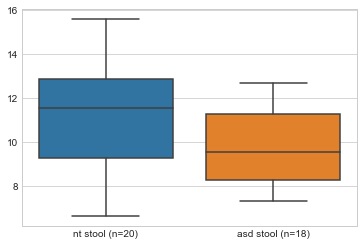

In [8]:
data = [asd.control_metric(sample_md, sample_type='stool', metric='Faith PD'),
        asd.asd_metric(sample_md, metric='Faith PD', sample_type='stool')]
ax = sns.boxplot(data=data)
ax.set_xticklabels(['nt stool (n=%d)' % len(data[0]),
                    'asd stool (n=%d)' % len(data[1])])

In [9]:
sample_md

,OldSampleID,BarcodeSequence,LinkerPrimerSequence,run,SampleType,Group,SubjectID,time_point,week,MostRecentDonorID,...,unweighted UniFrac to initial donor,unweighted UniFrac to most relevant donor,weighted UniFrac to initial donor,weighted UniFrac to most relevant donor,Bray-Curtis to initial donor,Bray-Curtis to most relevant donor,Jaccard to initial donor,Jaccard to most relevant donor,Faith PD,Observed OTUs
#SampleID,,,,,,,,,,,,,,,,,,,,,
595e93ed.e4b3.42b5.91b1.1ad4f31e7134,1.ST001,GTGCAACCAATC,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B101,1,0,pre-treatment,...,0.568372,0.568372,0.181541,0.181541,0.873537,0.873537,0.806630,0.806630,7.662921,94.0
c61b44a5.ae92.4202.9d0c.b4507197e456,3.ST001,TGAACCCTATGG,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B103,1,0,pre-treatment,...,0.546946,0.546946,0.215677,0.215677,0.822008,0.822008,0.829545,0.829545,8.431734,84.0
98d36350.175c.439b.a534.27de6e5783ad,5.ST001,TCATGCTCCATT,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B105,1,0,pre-treatment,...,0.466754,0.466754,0.329471,0.329471,0.840695,0.840695,0.666667,0.666667,8.513264,103.0
90120dc2.ad2e.4916.a660.633ba4b6a7b8,7.ST001,CGCAGATTAGTA,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B107,1,0,pre-treatment,...,0.506984,0.506984,0.164932,0.164932,0.670630,0.670630,0.745098,0.745098,11.471766,134.0
fe826a14.1ed8.4d19.b14d.2233b960e1bc,9.ST001,AGCAACATTGCA,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B109,1,0,pre-treatment,...,0.484694,0.484694,0.252532,0.252532,0.751038,0.751038,0.720207,0.720207,9.914658,125.0
eb598d02.406f.4ac6.93bd.1d3b8d5682ac,11.ST001,GAGAGCAACAGA,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B111,1,0,pre-treatment,...,0.621757,0.621757,0.257263,0.257263,0.769347,0.769347,0.788546,0.788546,12.625609,176.0
eda34f8e.ddec.427c.86f1.2a458ef4f7a5,13.ST001,CGTGACAATAGT,GTGTGCCAGCMGCCGCGGTAA,3,stool,autism,B113,1,0,pre-treatment,...,0.490287,0.490287,0.236878,0.236878,0.631937,0.631937,0.745665,0.745665,9.453417,95.0
0a75af43.917b.4ba4.bd50.0607a68a587b,15.ST001,AGTGTTTCGGAC,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B115,1,0,pre-treatment,...,0.482406,0.482406,0.366102,0.366102,0.899396,0.899396,0.670000,0.670000,9.646052,117.0
4a06dba1.77c7.4197.942f.0c8da8b1ab8c,17.ST001,ACGATTCGAGTC,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B117,1,0,pre-treatment,...,0.515599,0.515599,0.167377,0.167377,0.536618,0.536618,0.713333,0.713333,7.778748,94.0


## Change with time: stool (Faith PD)

/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


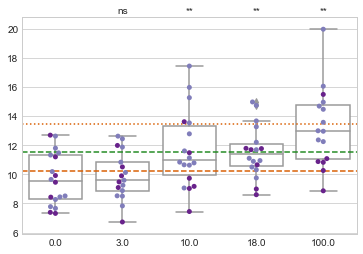

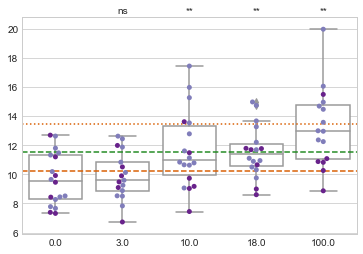

In [10]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
               metric='Faith PD', hue='rectal_oral')

In [11]:
asd.tabulate_week_to_week0_paired_stats(sample_md, sample_type='stool',
                                    metric='Faith PD')

/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,n,Faith PD,test-statistic,p-value,q-value
week,,,,,
0.0,0,NaN,0.0,NaN,NaN
3.0,17,0.251451,70.0,0.758312,0.758312
10.0,18,1.639961,20.0,0.004337,0.005783
18.0,18,1.784504,4.0,0.000386,0.001545
100.0,16,3.747202,5.0,0.001123,0.002247


In [12]:
asd.tabulate_week_to_control_stats(sample_md, sample_type='stool',
                               metric='Faith PD')

,n,Faith PD,test-statistic,p-value,q-value
week,,,,,
0.0,18,9.549735,109.0,0.019647,0.049119
3.0,17,9.592980,121.0,0.069692,0.116153
10.0,18,10.981772,167.0,0.357391,0.368358
18.0,18,11.393924,168.0,0.368358,0.368358
100.0,16,12.972867,93.0,0.017127,0.049119


## Change with time: stool (other metrics)

/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


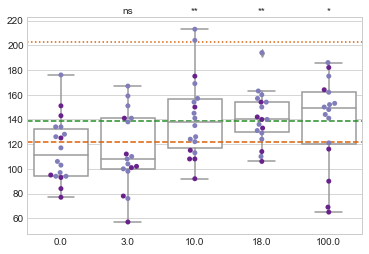

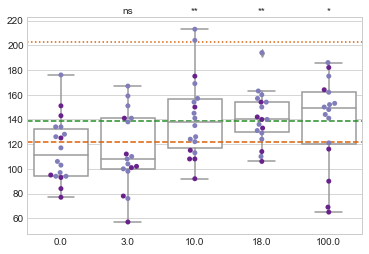

In [13]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
               metric='Observed OTUs', hue='rectal_oral')

## Engraftment: stool (unweighted UniFrac)

/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


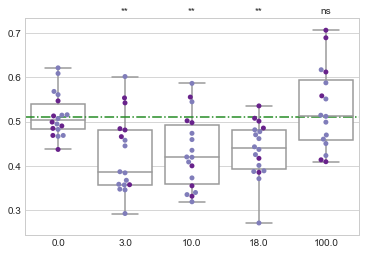

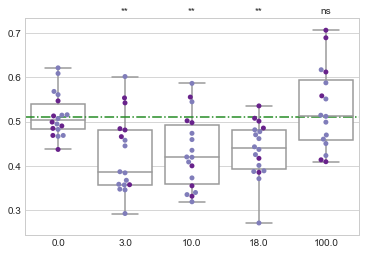

In [14]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='unweighted UniFrac to most relevant donor', hue='rectal_oral',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)

## Engraftment: stool (other metrics)

/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


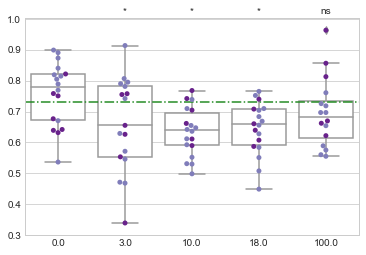

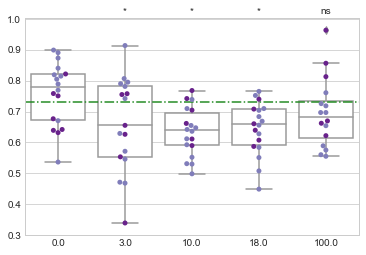

In [15]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='Bray-Curtis to most relevant donor', hue='rectal_oral',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=bc_dm)

/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


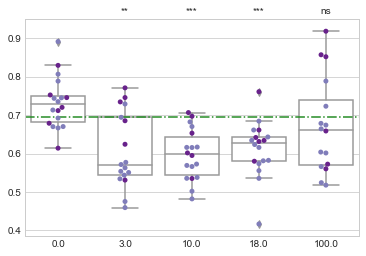

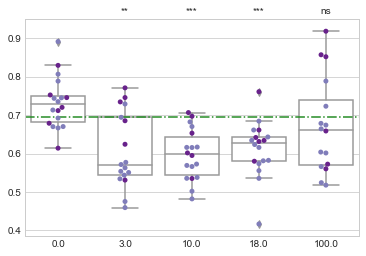

In [16]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='Jaccard to most relevant donor', hue='rectal_oral',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=bj_dm)

/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gregcaporaso/miniconda3/envs/q2-dev/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


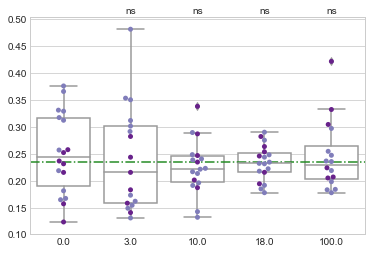

In [17]:
e = asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='weighted UniFrac to most relevant donor', hue='rectal_oral',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=wu_dm)

## Individualized plots

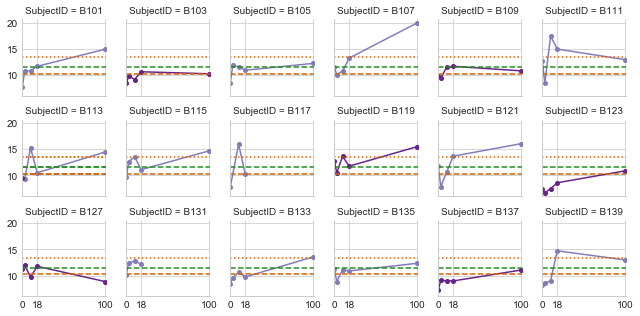

In [18]:
asd.plot_week_data_facet(sample_md, sample_type='stool',
                              metric='Faith PD',
                              hue='rectal_oral')

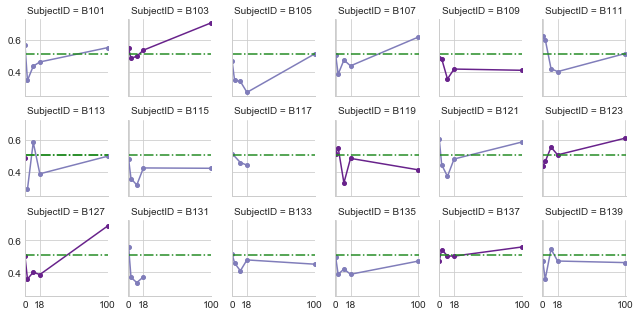

In [19]:
asd.plot_week_data_facet(sample_md, sample_type='stool',
                              metric='unweighted UniFrac to most relevant donor',
                              hue='rectal_oral',
                              hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)